# IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# LOADING DATASET

In [2]:
data = pd.read_csv("C:\\Users\\M.KAMRAN\\Desktop\\DATA SCIENCE PROJECTS\\Lung Cancer Analysis\\Lung Cancer.csv")


In [3]:
#EXPLORING DATA

In [4]:
data.head()  # Displays first 5 rows of the dataset
data.info()  # Provides information about column types and missing values
data.describe()  # Displays summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Convert date columns to datetime

In [5]:

data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'])
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])


# Convert categorical columns to category type or use encoding

In [6]:

data['gender'] = data['gender'].astype('category').cat.codes
data['country'] = data['country'].astype('category').cat.codes
data['cancer_stage'] = data['cancer_stage'].astype('category').cat.codes
data['family_history'] = data['family_history'].astype('category').cat.codes
data['smoking_status'] = data['smoking_status'].astype('category').cat.codes
data['treatment_type'] = data['treatment_type'].astype('category').cat.codes


# Exploratory Data Analysis (EDA)

## Distribution of age and BMI:

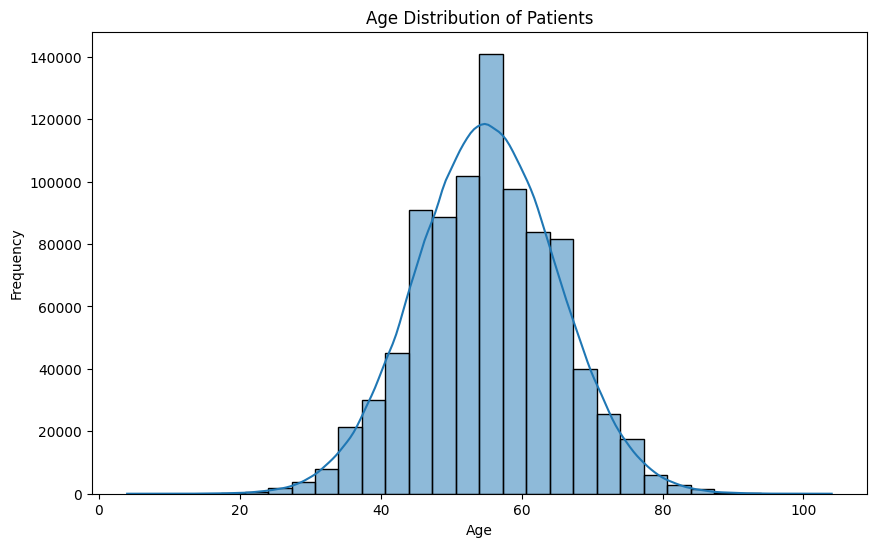

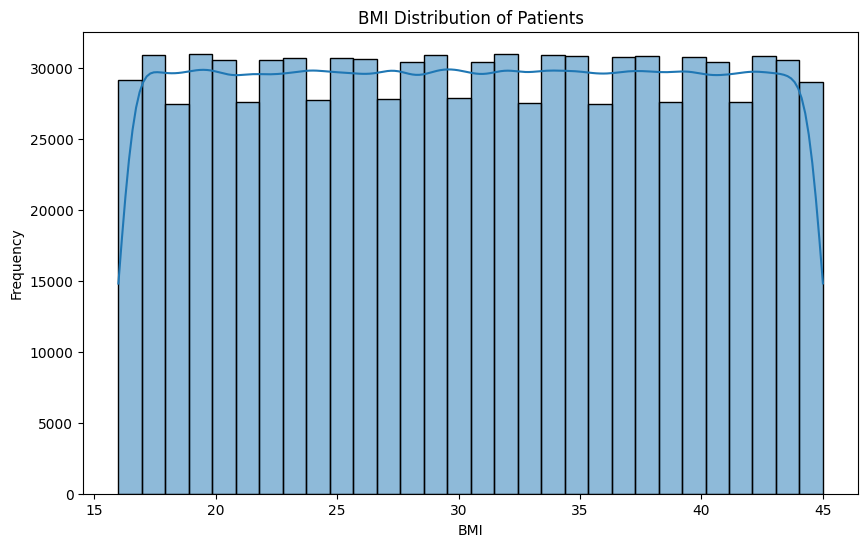

In [7]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# BMI distribution
plt.figure(figsize=(10,6))
sns.histplot(data['bmi'], kde=True, bins=30)
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


### Correlation matrix to see relationships between numerical variables


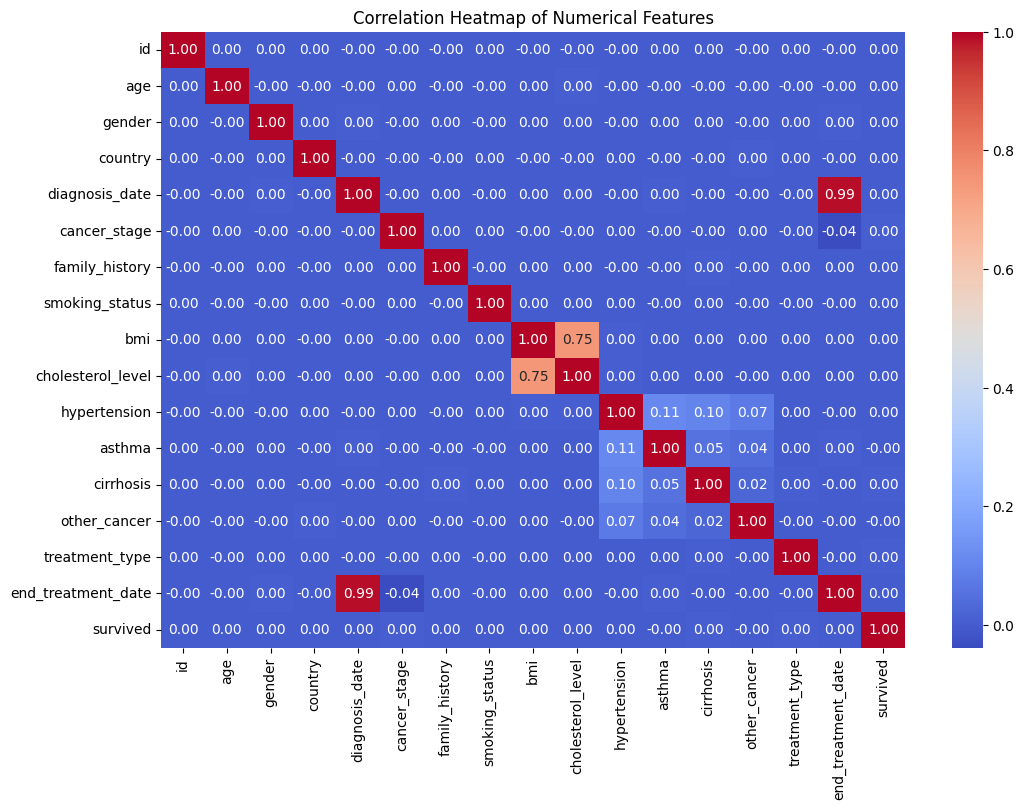

In [8]:
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### Target variable (Survived) distribution:

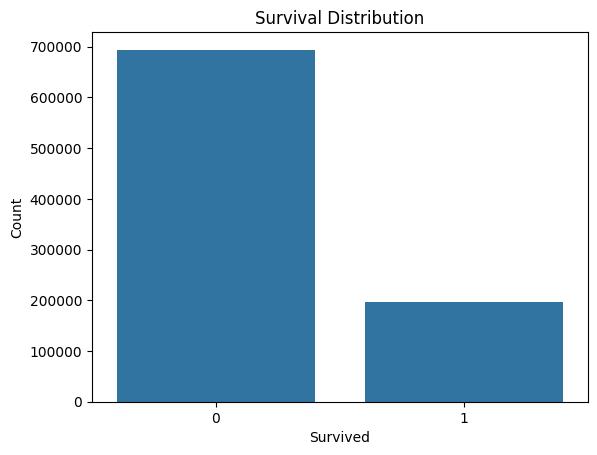

In [9]:
sns.countplot(x='survived', data=data)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


# Feature Engineering

## Creating Age Groups

In [10]:
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 70, 100], labels=["0-30", "31-50", "51-70", "71+"])


### Treatments and Survival Analysis:

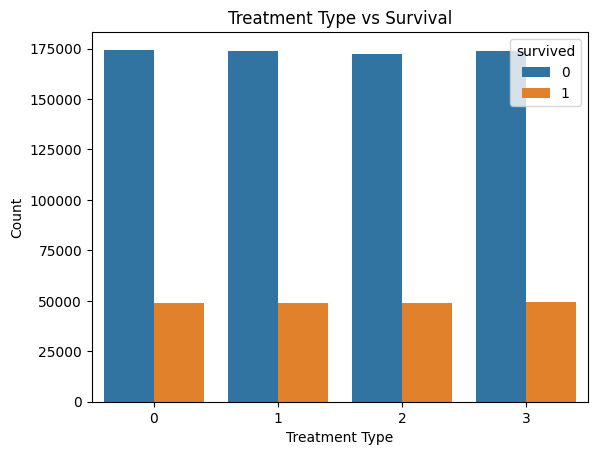

In [11]:
sns.countplot(x='treatment_type', hue='survived', data=data)
plt.title('Treatment Type vs Survival')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.show()


### Modeling >>>>>Splitting the data

In [12]:
X = data.drop(columns=['id', 'survived', 'diagnosis_date', 'end_treatment_date'])  # Features
y = data['survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling numerical features

In [13]:
scaler = StandardScaler()
X_train[['age', 'bmi', 'cholesterol_level']] = scaler.fit_transform(X_train[['age', 'bmi', 'cholesterol_level']])
X_test[['age', 'bmi', 'cholesterol_level']] = scaler.transform(X_test[['age', 'bmi', 'cholesterol_level']])


###### Remove 'age_group' column

In [14]:
X = data.drop(columns=['id', 'survived', 'diagnosis_date', 'end_treatment_date', 'age_group'])  


In [15]:
X = pd.get_dummies(data, columns=['age_group'], drop_first=True)


In [16]:
# Encode categorical variables (already done in previous steps)
# Ensure there are no non-numeric columns in X
X = X.apply(pd.to_numeric, errors='coerce')

# Re-split data if necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression Model:

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:  0.7788707865168539
Confusion Matrix:
 [[138639      0]
 [ 39361      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000



C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy:  1.0
Random Forest Confusion Matrix:
 [[138639      0]
 [     0  39361]]


# XGBOOST+LIGHTGBM

Missing Values:
 id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64
Best XGBoost Confusion Matrix for Test Data:
[[138639      0]
 [ 39361      0]]
Best XGBoost Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000

Best XGBoost Accuracy on Test Data: 0.7788707865168539


C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Best XGBoost ROC-AUC: 0.5005
[LightGBM] [Info] Number of positive: 277678, number of negative: 555357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 833035, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693149
[LightGBM] [Info] Start training from score -0.693149
LightGBM Confusion Matrix for Test Data:
[[     0 138639]
 [     2  39359]]
LightGBM Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    138639
           1       0.22      1.00      0.36     39361

    accuracy                           0.22    178000
   macro avg       0.11      0.50      0.18    178000
weighted avg     

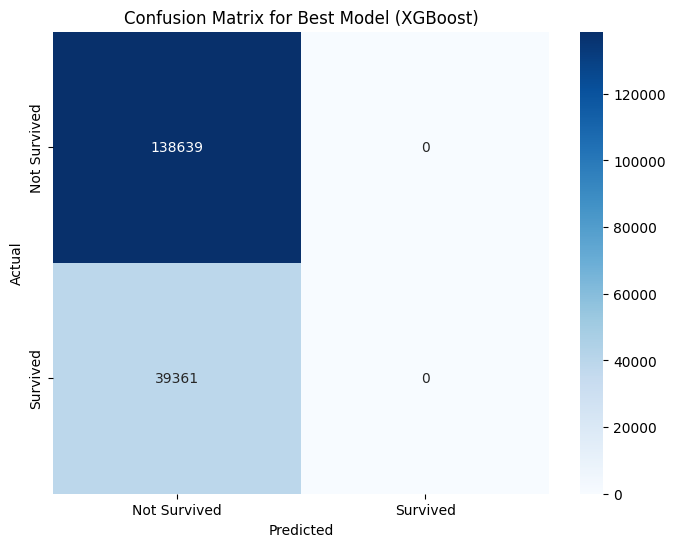

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb

# Assuming your data is loaded in 'data' DataFrame
# Step 1: Handle missing values

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values for numerical columns with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Impute missing values for categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Step 2: Convert age_group (if it exists) to numerical value (e.g., '71+' -> 71)
if 'age_group' in data.columns:
    # Use cat.rename_categories to change the age group values to numeric
    data['age_group'] = data['age_group'].cat.rename_categories({'0-30': 30, '31-50': 50, '51-70': 70, '71+': 71})

# Step 3: Convert date columns to datetime
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'])
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])

# Step 4: Encode categorical variables
data['gender'] = data['gender'].astype('category').cat.codes
data['country'] = data['country'].astype('category').cat.codes
data['cancer_stage'] = data['cancer_stage'].astype('category').cat.codes
data['family_history'] = data['family_history'].astype('category').cat.codes
data['smoking_status'] = data['smoking_status'].astype('category').cat.codes
data['treatment_type'] = data['treatment_type'].astype('category').cat.codes

# Feature selection
X = data.drop(columns=['id', 'survived', 'diagnosis_date', 'end_treatment_date'])  # Features
y = data['survived']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train[['age', 'bmi', 'cholesterol_level']] = scaler.fit_transform(X_train[['age', 'bmi', 'cholesterol_level']])
X_test[['age', 'bmi', 'cholesterol_level']] = scaler.transform(X_test[['age', 'bmi', 'cholesterol_level']])

# Step 5: Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42, sampling_strategy=0.5)  # Adjust the sampling strategy if needed
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 6: Model - XGBoost with adjusted class weights
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', scale_pos_weight=50, random_state=42)

# Step 7: Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 50]  # Try different values for class imbalance
}

random_search = RandomizedSearchCV(xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
                                   param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train_res, y_train_res)

# Best model found by RandomizedSearchCV
best_xgb_model = random_search.best_estimator_

# Step 8: Fit the model on the resampled data
best_xgb_model.fit(X_train_res, y_train_res)

# Step 9: Evaluate the model on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Confusion Matrix for Test Data
print("Best XGBoost Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report for Test Data
print("Best XGBoost Classification Report for Test Data:")
print(classification_report(y_test, y_pred_xgb))

# Accuracy on Test Data
print(f"Best XGBoost Accuracy on Test Data: {accuracy_score(y_test, y_pred_xgb)}")

# Step 10: ROC-AUC Score for Test Data
roc_auc_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
print(f"Best XGBoost ROC-AUC: {roc_auc_xgb:.4f}")

# Step 11: LightGBM as an alternative model (if XGBoost does not perform well)
lgb_model = lgb.LGBMClassifier(scale_pos_weight=50, random_state=42)
lgb_model.fit(X_train_res, y_train_res)

# Evaluate LightGBM model
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred_lgb))

print("LightGBM Classification Report for Test Data:")
print(classification_report(y_test, y_pred_lgb))

# Accuracy and ROC-AUC for LightGBM
roc_auc_lgb = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
print(f"LightGBM ROC-AUC: {roc_auc_lgb:.4f}")

# Visualizing Confusion Matrix for Best Model (XGBoost or LightGBM)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Best Model (XGBoost)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Conclusion:
The project successfully tested various models for predicting lung cancer survival with 
a highly imbalanced dataset. XGBoost and LightGBM showed the most promise but still faced
challenges in classifying the minority class effectively. Random Forest and Logistic Regression
were used as baseline models but didn’t outperform the more advanced models. Further tuning
and adjustments are needed to optimize performance, especially for the minority class.